In [2]:
import sys
import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
dataset_path = Path(Path.cwd().parent, 'fp_inspector/data/script_labels.csv')
with open(dataset_path) as f:
     df = pd.read_csv(f)

In [4]:
df.head()

,site,scriptName,fileSize,label
0,444.coffee,3d1bd8049b2548f0fd354618730a0306,7.70,0
1,444.coffee,0f501621aa753547943d70a83be7c6dc,8.36,0
2,444.coffee,2109e7cfa1e9d2d54062ced76303c1a4,42.58,0
3,444.coffee,5a2c08ebe3e2e03bccdb43465bed8e15,62.36,0
4,444.coffee,e263ab154b7b2d107c87d15314cf0406,1.21,0


In [5]:
df['label'].value_counts()

label
0    2171593
1       5013
Name: count, dtype: int64

In [5]:
df[(df['fileSize'] < 2) & (df['label'] == 1)]

,site,scriptName,fileSize,label
48103,nsctotal.com.br,159400917bec7cdaf7f0f38a0a7d4089,1.86,1
122449,rssing.com,02c6128d0dd55d4a75c69ccad1cffec5,0.00,1
211441,ambientweather.com,67842ffca5de57a1de0795b08a7ba927,0.00,1
234277,atlantidasc.com.br,159400917bec7cdaf7f0f38a0a7d4089,1.86,1
254218,seucreditodigital.com.br,159400917bec7cdaf7f0f38a0a7d4089,1.86,1
282881,readsnovelonline.net,cc76c47a39812a1fc2a50362d2339239,0.00,1
361192,earnalliance.com,acf407fb45d4babaa6aa81a7d779dd37,0.25,1
366766,hdmediagroup.vn,221f234e3f531ca23dbb3e54c1ca83d3,0.00,1
372431,readsololeveling.org,2a65c619de932d4f06bcf48c11742905,0.00,1
389254,xosocattuong.vn,4c2a6efd98410e44780657364e63725c,0.00,1


In [24]:
file_size = list(df['fileSize'])

In [45]:
file_size.sort()
file_size[-200:]

[6265.33,
 6293.24,
 6302.56,
 6318.58,
 6330.1,
 6354.33,
 6370.57,
 6389.15,
 6400.55,
 6413.12,
 6419.84,
 6479.57,
 6493.94,
 6516.64,
 6517.13,
 6517.13,
 6531.99,
 6531.99,
 6539.26,
 6544.18,
 6635.86,
 6654.32,
 6759.78,
 6776.78,
 6795.52,
 6802.62,
 6841.3,
 6859.17,
 6892.71,
 6903.03,
 6904.43,
 6905.42,
 6916.37,
 6920.47,
 6933.31,
 6943.57,
 6946.49,
 6951.74,
 6954.4,
 7001.37,
 7008.52,
 7029.03,
 7070.75,
 7117.76,
 7121.1,
 7188.9,
 7231.44,
 7260.85,
 7268.56,
 7310.85,
 7312.81,
 7442.65,
 7456.63,
 7457.21,
 7460.59,
 7510.34,
 7545.85,
 7553.48,
 7553.48,
 7633.78,
 7695.89,
 7823.49,
 7858.12,
 7880.9,
 7893.11,
 7932.51,
 7960.54,
 7966.25,
 8082.32,
 8104.34,
 8125.56,
 8169.62,
 8192.93,
 8252.05,
 8304.95,
 8370.66,
 8375.59,
 8375.59,
 8395.11,
 8421.26,
 8477.11,
 8497.71,
 8507.79,
 8519.24,
 8519.3,
 8621.13,
 8625.94,
 8677.69,
 8691.7,
 8700.09,
 8710.77,
 8775.45,
 8822.22,
 8823.97,
 8825.19,
 8846.13,
 8846.13,
 8847.95,
 8852.8,
 8873.82,
 8906.16,

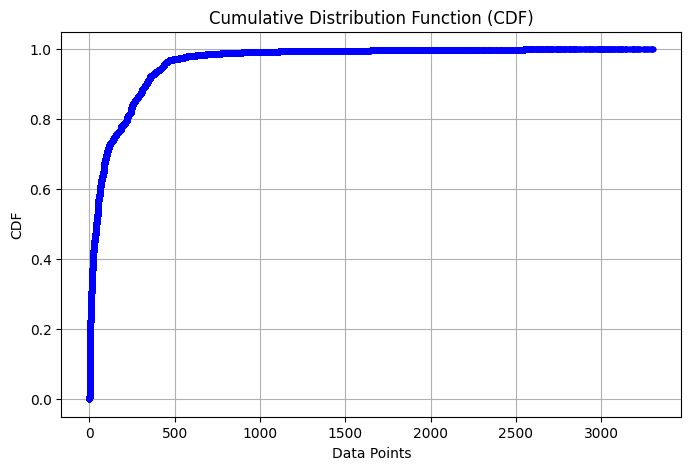

In [47]:
data_sorted = np.sort(file_size[:-1000])

# Calculate the CDF values
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Optional: defines the size of the figure
plt.plot(data_sorted, cdf, marker='.', linestyle='-', color='b')  # Plot the CDF
plt.title('Cumulative Distribution Function (CDF)')  # Add a title
plt.xlabel('Data Points')  # Add an x-label
plt.ylabel('CDF')  # Add a y-label
plt.grid(True)  # Add a grid
plt.show()  # Display the plot